Datasets created and saved as CSV files.
Data cleaned and saved as CSV files.
Frequency Table - Average Hours Spent on Campus (Exam 1):
Average hours spent studying on campus
4-5    60
1-2    51
2-3    36
Name: count, dtype: int64

Frequency Table - Student Age (Exam 1):
Student age
25-35      39
over 45    37
35-45      37
18-25      34
Name: count, dtype: int64

Frequency Table - Student Mark (Exam 1):
Mark Range
91-120     43
31-60      41
0-30       33
61-90      18
121-130    12
Name: count, dtype: int64


C:\Users\Ntando\AppData\Local\Temp\ipykernel_5512\2370137387.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exam1_df_clean['Mark Range'] = pd.cut(exam1_df_clean['Student mark achieved'], bins=mark_bins, labels=mark_labels)
C:\Users\Ntando\AppData\Local\Temp\ipykernel_5512\2370137387.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exam2_df_clean['Mark Range'] = pd.cut(exam2_df_clean['Student mark achieved'], bins=mark_bins, labels=mark_labels)


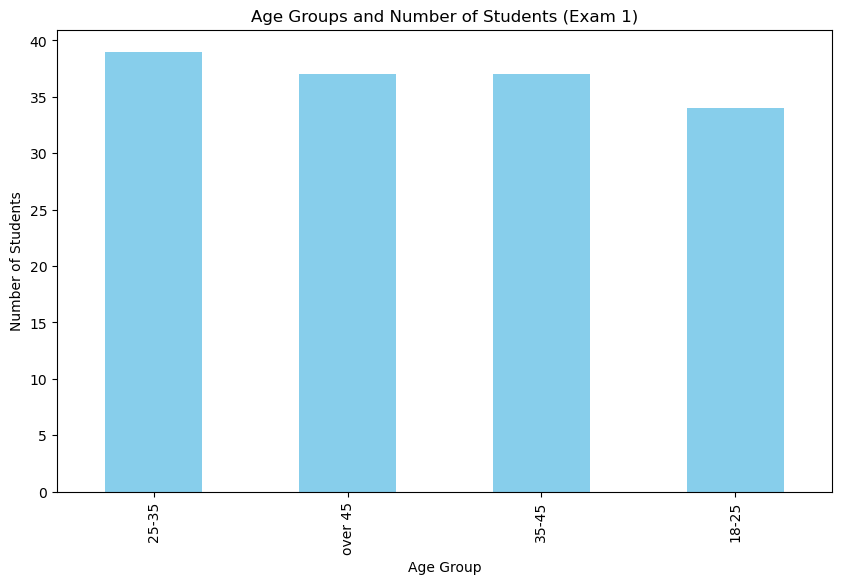

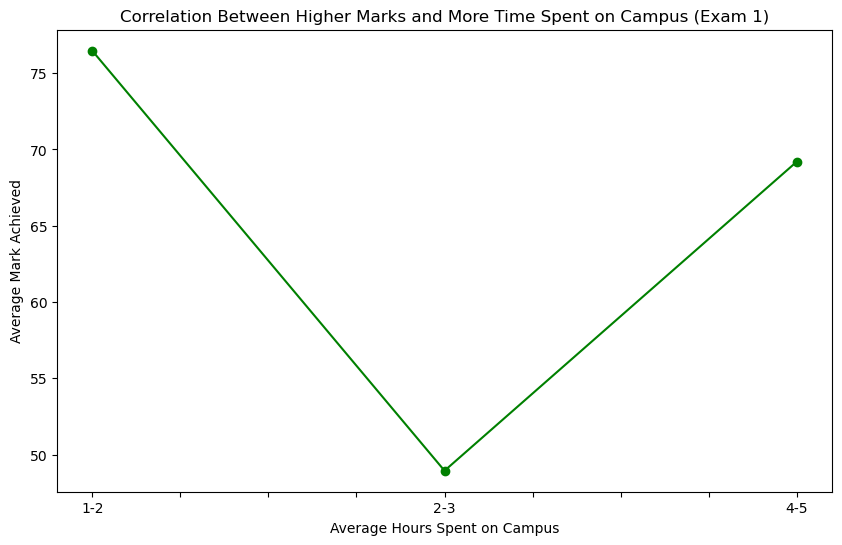

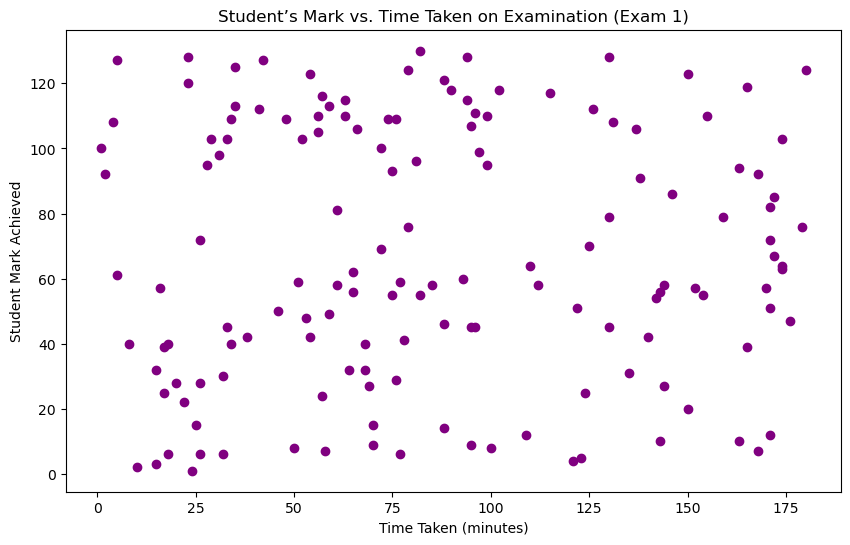

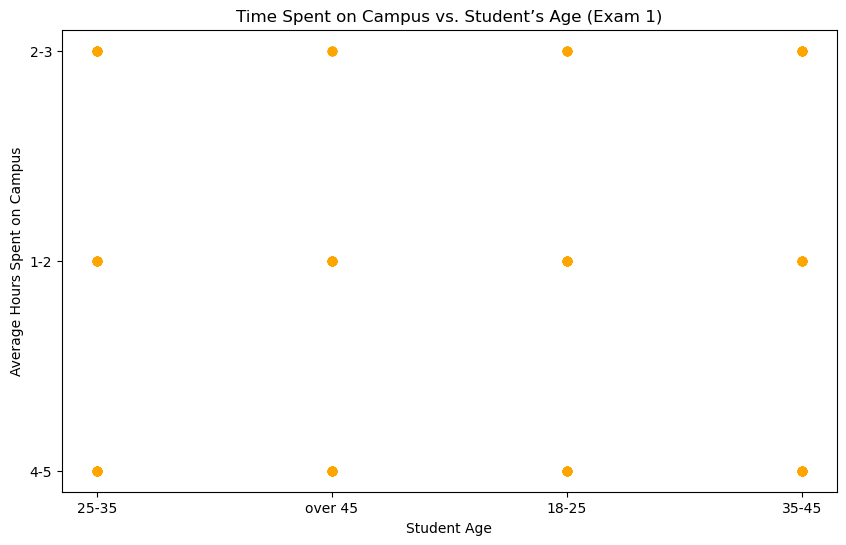

Data cleaned and saved as CSV files.


In [1]:
import pandas as pd
import numpy as np
import random

# Function to generate random student data
def generate_student_data():
    student_data = []
    for i in range(1, 151):
        student_number = f"S{i:03d}"  # Unique student number
        age_group = random.choice(["18-25", "25-35", "35-45", "over 45"])  # Random age group
        study_hours = random.choice(["1-2", "2-3", "4-5"])  # Random study hours
        mark = random.randint(0, 130)  # Random mark between 0 and 130
        percentage = (mark / 130) * 100  # Calculate percentage
        time_taken = random.randint(0, 180)  # Random time taken in exam (0 to 180 minutes)

        student_data.append([student_number, age_group, study_hours, mark, percentage, time_taken])

    return student_data

# Generate datasets for Exam 1 and Exam 2
columns = ["Student number", "Student age", "Average hours spent studying on campus", "Student mark achieved", "Percentage", "Time taken on examination (minutes)"]

exam1_data = generate_student_data()
exam2_data = generate_student_data()

# Convert to DataFrame
exam1_df = pd.DataFrame(exam1_data, columns=columns)
exam2_df = pd.DataFrame(exam2_data, columns=columns)

# Save as CSV
exam1_df.to_csv("exam1_data.csv", index=False)
exam2_df.to_csv("exam2_data.csv", index=False)

print("Datasets created and saved as CSV files.")

# Load the datasets
exam1_df = pd.read_csv("exam1_data.csv")
exam2_df = pd.read_csv("exam2_data.csv")

# Remove rows where 'Student mark achieved' or 'Time taken on examination' is zero
exam1_df_clean = exam1_df[(exam1_df['Student mark achieved'] > 0) & (exam1_df['Time taken on examination (minutes)'] > 0)]
exam2_df_clean = exam2_df[(exam2_df['Student mark achieved'] > 0) & (exam2_df['Time taken on examination (minutes)'] > 0)]

# Save cleaned datasets
exam1_df_clean.to_csv("exam1_data_clean.csv", index=False)
exam2_df_clean.to_csv("exam2_data_clean.csv", index=False)

print("Data cleaned and saved as CSV files.")


# Frequency table for Average hours spent on campus
hours_freq_exam1 = exam1_df_clean['Average hours spent studying on campus'].value_counts()
hours_freq_exam2 = exam2_df_clean['Average hours spent studying on campus'].value_counts()

# Frequency table for Student age
age_freq_exam1 = exam1_df_clean['Student age'].value_counts()
age_freq_exam2 = exam2_df_clean['Student age'].value_counts()

# Frequency table for Student mark (Grouped into ranges for better visualization)
mark_bins = [0, 30, 60, 90, 120, 130]
mark_labels = ['0-30', '31-60', '61-90', '91-120', '121-130']

exam1_df_clean['Mark Range'] = pd.cut(exam1_df_clean['Student mark achieved'], bins=mark_bins, labels=mark_labels)
exam2_df_clean['Mark Range'] = pd.cut(exam2_df_clean['Student mark achieved'], bins=mark_bins, labels=mark_labels)

mark_freq_exam1 = exam1_df_clean['Mark Range'].value_counts()
mark_freq_exam2 = exam2_df_clean['Mark Range'].value_counts()

# Display frequency tables
print("Frequency Table - Average Hours Spent on Campus (Exam 1):")
print(hours_freq_exam1)
print("\nFrequency Table - Student Age (Exam 1):")
print(age_freq_exam1)
print("\nFrequency Table - Student Mark (Exam 1):")
print(mark_freq_exam1)

# Repeat for Exam 2 if needed

import matplotlib.pyplot as plt

# Bar Chart: Ages and Numbers of Students
age_counts_exam1 = exam1_df_clean['Student age'].value_counts()

plt.figure(figsize=(10, 6))
age_counts_exam1.plot(kind='bar', color='skyblue')
plt.title('Age Groups and Number of Students (Exam 1)')
plt.xlabel('Age Group')
plt.ylabel('Number of Students')
plt.show()

# Line Graph: Correlation Between Higher Marks and More Time Spent on Campus
avg_hours_groups = exam1_df_clean.groupby('Average hours spent studying on campus')['Student mark achieved'].mean()

plt.figure(figsize=(10, 6))
avg_hours_groups.plot(kind='line', marker='o', color='green')
plt.title('Correlation Between Higher Marks and More Time Spent on Campus (Exam 1)')
plt.xlabel('Average Hours Spent on Campus')
plt.ylabel('Average Mark Achieved')
plt.show()

# Scatter Chart: Student's Mark vs. Time Taken on the Examination
plt.figure(figsize=(10, 6))
plt.scatter(exam1_df_clean['Time taken on examination (minutes)'], exam1_df_clean['Student mark achieved'], color='purple')
plt.title('Student’s Mark vs. Time Taken on Examination (Exam 1)')
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Student Mark Achieved')
plt.show()

# Scatter Chart: Time Spent on Campus vs. Student’s Age
plt.figure(figsize=(10, 6))
plt.scatter(exam1_df_clean['Student age'], exam1_df_clean['Average hours spent studying on campus'], color='orange')
plt.title('Time Spent on Campus vs. Student’s Age (Exam 1)')
plt.xlabel('Student Age')
plt.ylabel('Average Hours Spent on Campus')
plt.show()

# Load the datasets
exam1_df = pd.read_csv("exam1_data.csv")
exam2_df = pd.read_csv("exam2_data.csv")

# Remove rows where 'Student mark achieved' or 'Time taken on examination' is zero
exam1_df_clean = exam1_df[(exam1_df['Student mark achieved'] > 0) & (exam1_df['Time taken on examination (minutes)'] > 0)]
exam2_df_clean = exam2_df[(exam2_df['Student mark achieved'] > 0) & (exam2_df['Time taken on examination (minutes)'] > 0)]

# Save cleaned datasets
exam1_df_clean.to_csv("exam1_data_clean.csv", index=False)
exam2_df_clean.to_csv("exam2_data_clean.csv", index=False)

print("Data cleaned and saved as CSV files.")

